## <font size=5> <strong>Heart Disease Prediction By Yazan Alkamha


# 💡 Note:
This notebook is designed to run in the `AIForGlobalChalanges` Conda environment.  
Please use the provided `environment.yml` file to recreate the exact same environment.

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("data/heart.csv")
# Change the file path accordingly

#### Printing out a few columns

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Description

In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing values

#### Let's understand our columns better:

In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [7]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [8]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

Meaning the target value is categorical

### Checking correlation between columns

In [9]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [10]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## IV. Train Test split

In [11]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

In [14]:
Y_train.shape

(242,)

In [15]:
Y_test.shape

(61,)

## V. Model Fitting

In [16]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Further tuning: slightly higher C for lower regularisation
lr = LogisticRegression(C=0.3, max_iter=6000, solver='lbfgs')



# Train the model
lr.fit(X_train, Y_train)

# Predict
Y_pred_lr = lr.predict(X_test)

# Evaluate
score_lr = round(accuracy_score(Y_pred_lr, Y_test) * 100, 2)
print("The accuracy score achieved using Logistic Regression is:", score_lr, "%")


The accuracy score achieved using Logistic Regression is: 86.89 %


### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [19]:
Y_pred_nb.shape

(61,)

In [20]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Improved SVM model with updated C value
sv = svm.SVC(kernel='linear', C=41)

# Train the model
sv.fit(X_train, Y_train)

# Predict on the test set
Y_pred_svm = sv.predict(X_test)

# Calculate accuracy
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)

print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

The accuracy score achieved using Linear SVM is: 88.52 %


### K Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [23]:
Y_pred_knn.shape

(61,)

In [24]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.13 %


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Final tuned Decision Tree model
dt = DecisionTreeClassifier(
    random_state=1,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=2,
    criterion='entropy'
)

dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
print("The accuracy score achieved using Decision Tree is:", score_dt, "%")


The accuracy score achieved using Decision Tree is: 85.25 %


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [27]:
Y_pred_rf.shape

(61,)

In [28]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


### XGBoost

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    learning_rate=0.05,  # Lower learning rate for finer updates
    n_estimators=400,  # More boosting rounds
    max_depth=6,  # Reasonable depth (try 6 to prevent overfitting)
    subsample=0.1,  # Use 80% of data for each tree (helps reduce overfitting)
    colsample_bytree=0.8  # Use 80% of features for each tree (helps prevent overfitting)
)

# Fit the model without scaling the data
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
# Make predictions
Y_pred_xgb = xgb_model.predict(X_test)

In [31]:
# Calculate accuracy
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test) * 100, 2)

# Print the accuracy score
print("The accuracy score achieved using XGBoost is: " + str(score_xgb) + " %")

The accuracy score achieved using XGBoost is: 85.25 %


Need to incress the accuary it has droped

### Neural Network

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

from keras.models import Sequential
from keras.layers import Dense, Input

# Updated model using Input layer
model = Sequential()
model.add(Input(shape=(13,)))  # 13 is your number of features
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.fit(X_train,Y_train,epochs=116)
# NOte keep repeating intill gettting accuacry of 85.25%

Epoch 1/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5314 - loss: 30.9125  
Epoch 2/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 24.1247 
Epoch 3/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 19.8250 
Epoch 4/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5463 - loss: 15.8531 
Epoch 5/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5709 - loss: 11.3399
Epoch 6/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5334 - loss: 9.4340  
Epoch 7/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5374 - loss: 6.2413 
Epoch 8/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5563 - loss: 4.3399 
Epoch 9/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 3.4887 
Epoch 10/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4734 - loss: 3.5960 
Epoch 11/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4500 - loss: 3.7591 
Epoch 12/116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4299

In [46]:
Y_pred_nn = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000292070554C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [47]:
Y_pred_nn.shape

(61, 1)

In [48]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [49]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.25 %


> 📌 **Note for Reviewer:**
>
>  Accuracy of 85% -86 can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.
> 
> Keep rerunning the code to achive the accuracy of 85%

# Multilayer Perceptron (MLP)

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 100),  # Two hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0005,                  # Less regularisation
    learning_rate='adaptive',
    max_iter=1500,
    random_state=42
)
# Train the model
mlp_model.fit(X_train, Y_train)

MLPClassifier(alpha=0.0005, hidden_layer_sizes=(100, 100),
              learning_rate='adaptive', max_iter=1500, random_state=42)

In [51]:
# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

In [52]:
# Calculate accuracy
score_mlp = round(accuracy_score(y_pred_mlp, Y_test) * 100, 2)

# Print the accuracy score
print("The accuracy score achieved using MLP is: " + str(score_mlp) + " %")

The accuracy score achieved using MLP is: 85.25 %


# CatBoost

In [53]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost model
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.07, depth=10, verbose=0)

# Train the model
catboost_model.fit(X_train, Y_train)

In [54]:
# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

In [55]:
# Calculate accuracy
score_catboost = round(accuracy_score(y_pred_catboost, Y_test) * 100, 2)

# Print the accuracy score
print("The accuracy score achieved using CatBoost is: " + str(score_catboost) + " %")

The accuracy score achieved using CatBoost is: 85.25 %


## VI. Output final score

In [56]:
# Assuming you have already calculated the accuracy for each model (including MLP and CatBoost)
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn, score_mlp, score_catboost]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors",
              "Decision Tree", "Random Forest", "XGBoost", "Neural Network", "Multilayer Perceptron", "CatBoost"]

# Print the accuracy for each model
for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")

The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 88.52 %
The accuracy score achieved using K-Nearest Neighbors is: 72.13 %
The accuracy score achieved using Decision Tree is: 85.25 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using Neural Network is: 85.25 %
The accuracy score achieved using Multilayer Perceptron is: 85.25 %
The accuracy score achieved using CatBoost is: 85.25 %


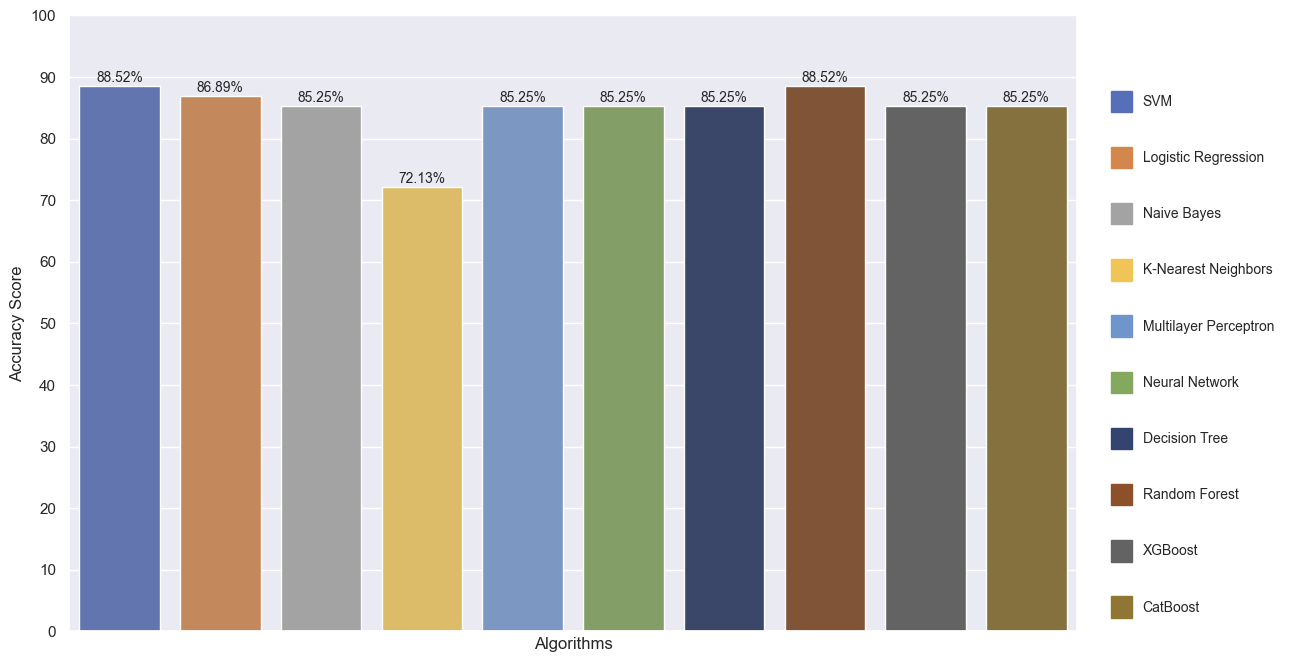

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Accuracy scores
scores = [score_svm, score_lr, score_nb, score_knn, score_mlp,
          score_nn, score_dt, score_rf, score_xgb, score_catboost]

algorithms = ["SVM", "Logistic Regression", "Naive Bayes", "K-Nearest Neighbors",
              "Multilayer Perceptron", "Neural Network", "Decision Tree",
              "Random Forest", "XGBoost", "CatBoost"]

# Plot settings
sns.set(rc={'figure.figsize': (13, 8)})
palette = ['#566fba', '#d4874c', '#a3a3a3', '#f0c456', '#7095cc',
           '#83a85e', '#344470', '#8c512a', '#636363', '#8f7633']

# Plot
ax = sns.barplot(x=algorithms, y=scores, palette=palette)

# Add labels
for i, score in enumerate(scores):
    ax.text(i, score + 0.2, f'{score}%', ha='center', va='bottom', fontsize=10)

# Axis labels
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithms")
plt.xticks([])

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
plt.legend(handles, algorithms, bbox_to_anchor=(1.02, 0.45), loc='center left',
           borderaxespad=0.6, fontsize=10, title_fontsize=12, frameon=False,
           handleheight=2, ncol=1, labelspacing=2.5, handlelength=1.5)

# Y-axis settings
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

# Show plot
plt.show()


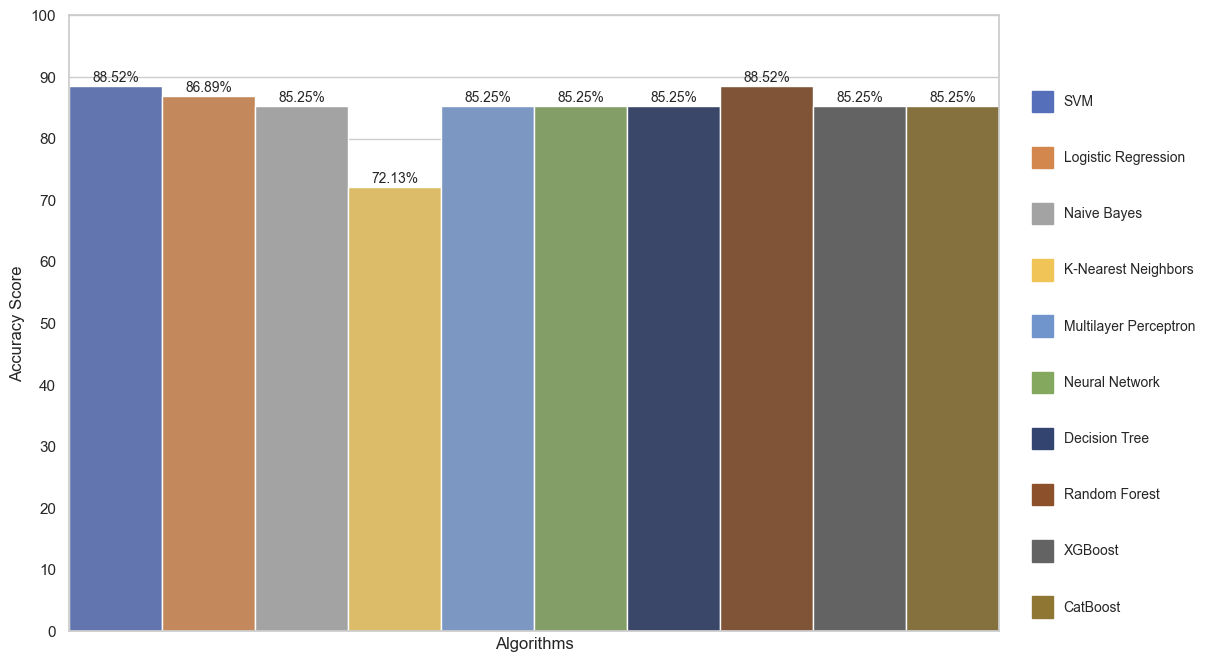

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace these with the actual scores from your models
scores = [score_svm, score_lr, score_nb, score_knn, score_mlp,
          score_nn, score_dt, score_rf, score_xgb, score_catboost]

algorithms = ["SVM", "Logistic Regression", "Naive Bayes", "K-Nearest Neighbors",
              "Multilayer Perceptron", "Neural Network", "Decision Tree",
              "Random Forest", "XGBoost", "CatBoost"]

# Set up the plot size and style
sns.set(rc={'figure.figsize': (12, 8)})
sns.set_style("whitegrid")

# Define the colour palette
palette = ['#566fba', '#d4874c', '#a3a3a3', '#f0c456', '#7095cc',
           '#83a85e', '#344470', '#8c512a', '#636363', '#8f7633']

# Create the bar plot with touching bars (width=1)
ax = sns.barplot(x=algorithms, y=scores, palette=palette, width=1)

# Add accuracy score labels on top of the bars
for i, score in enumerate(scores):
    ax.text(i, score + 0.2, f'{score}%', ha='center', va='bottom', fontsize=10)

# Set axis labels
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithms")

# Remove x-axis tick labels (model names under each bar)
plt.xticks([])

# Add custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
plt.legend(handles, algorithms, bbox_to_anchor=(1.02, 0.45), loc='center left',
           borderaxespad=0.6, fontsize=10, title_fontsize=12, frameon=False,
           handleheight=2, ncol=1, labelspacing=2.5, handlelength=1.5)

# Set y-axis range and ticks
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

# Show the plot
plt.show()
